<a href="https://colab.research.google.com/github/bonniyang/ba820/blob/main/BA820_TeamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [ ]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import missingno as msno
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the dataset
df = pd.read_csv("/content/TMDB_movie_dataset_v11.csv")

In [ ]:
# Examine the dataset
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


## Data Preprocessing


###1.Check Missing Values###

 We generated a missing value chart to provide a comprehensive overview of the data distribution, aiding us in identifying areas requiring attention.

<Axes: >

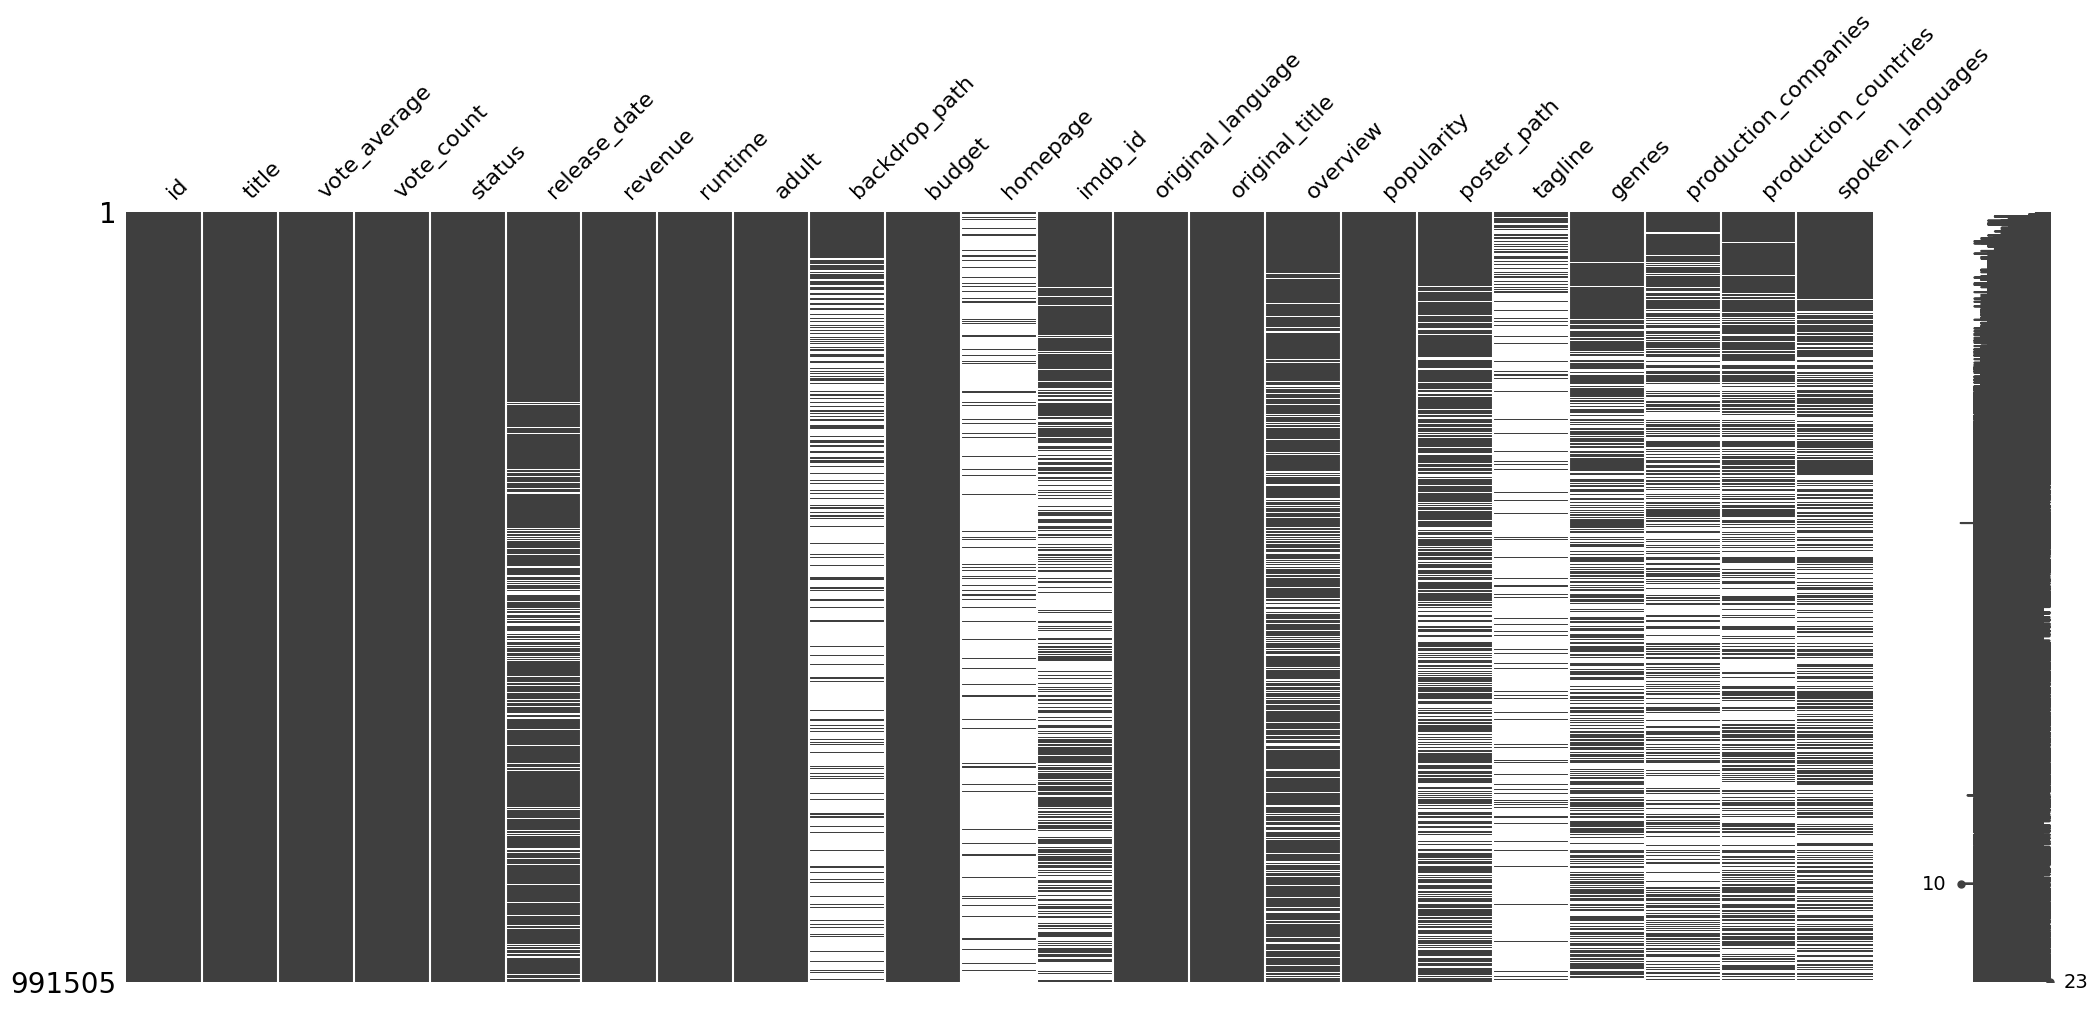

In [ ]:
# Plot a msno matrix to show NaN value distribution
msno.matrix(df)

In [ ]:
# Examine the dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991505 entries, 0 to 991504
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    991505 non-null  int64  
 1   title                 991493 non-null  object 
 2   vote_average          991505 non-null  float64
 3   vote_count            991505 non-null  int64  
 4   status                991505 non-null  object 
 5   release_date          881511 non-null  object 
 6   revenue               991505 non-null  int64  
 7   runtime               991505 non-null  int64  
 8   adult                 991505 non-null  bool   
 9   backdrop_path         283001 non-null  object 
 10  budget                991505 non-null  int64  
 11  homepage              107518 non-null  object 
 12  imdb_id               569184 non-null  object 
 13  original_language     991505 non-null  object 
 14  original_title        991493 non-null  object 
 15  

In [ ]:
# Examine the dataset's statistic info
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.915050e+05,991505.000000,991505.000000,9.915050e+05,991505.000000,9.915050e+05,991505.000000
mean,6.562278e+05,2.120968,21.628466,7.500084e+05,50.802460,2.953519e+05,1.361716
std,3.515143e+05,3.116937,340.938660,1.813656e+07,62.308547,5.161645e+06,8.113785
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.673360e+05,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.600000
50%,6.577670e+05,0.000000,0.000000,0.000000e+00,30.000000,0.000000e+00,0.600000
75%,9.624260e+05,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.920000
max,1.243324e+06,10.000000,34495.000000,3.000000e+09,14400.000000,9.000000e+08,2994.357000


###2.Drop Unused Columns###

We systematically pruned the dataset by removing redundant columns and those plagued by substantial missing values, defined as exceeding 50%. These excised columns included 'id', 'backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'revenue', 'budget', and 'spoken_languages', thereby streamlining the dataset for enhanced clarity and efficiency.

In [ ]:
# Drop unused columns - these columns won't be used in clustering or NLP
df = df.drop(['id', 'revenue', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'spoken_languages'], axis=1)

###3.Drop Null Values###

To protect data integrity, any rows containing null values ​​are also excluded from consideration.

In [ ]:
# Drop NaN values
df = df.dropna()

###4.Split 'Date' Column###

After preliminary refinement, we extract time information from the "release_date" field.

In [ ]:
# Extract year and month from 'release_date' to create new columns, and drop the original 'release_date'
df['year']=df['release_date'].str[:4]
df['month']=df['release_date'].str[5:7]
df.drop('release_date', axis=1, inplace=True)

###5.Set Year Period###


We are interested in films released from 2014 to 2023, covering a ten-year time frame. By narrowing the scope to this time period, we aimed to capture a contemporary and relevant subset of films for analysis.

In [ ]:
# Filter out movies that lie between 2014 and 2023
df['year'] = df['year'].astype(int)
df = df[(df['year']<2024) & (df['year']>2013)]

###6.Filter Data###

We used filtering to ensure that only released films were included. Additionally, limiting our dataset to "English” language films. We also excluded movies with zero votes, as popularity and public acceptance are important factors in determining the suitability of recommendations. Moreover, since negative runtime values are nonsensical, we exclude movies with negative or zero runtime durations.

In [ ]:
# Filter movies that are released, original language are english, vote count larger than zero and runtime longer than zero
# Drop the original 'index' column since we filtered
df = df[(df['status']=='Released') & (df['original_language']=='en') & (df['vote_count']!=0) & (df['runtime']>0)].reset_index()
df = df.drop('index',axis=1)

In [ ]:
# Examine the preprocessed dataset
df.head()

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04


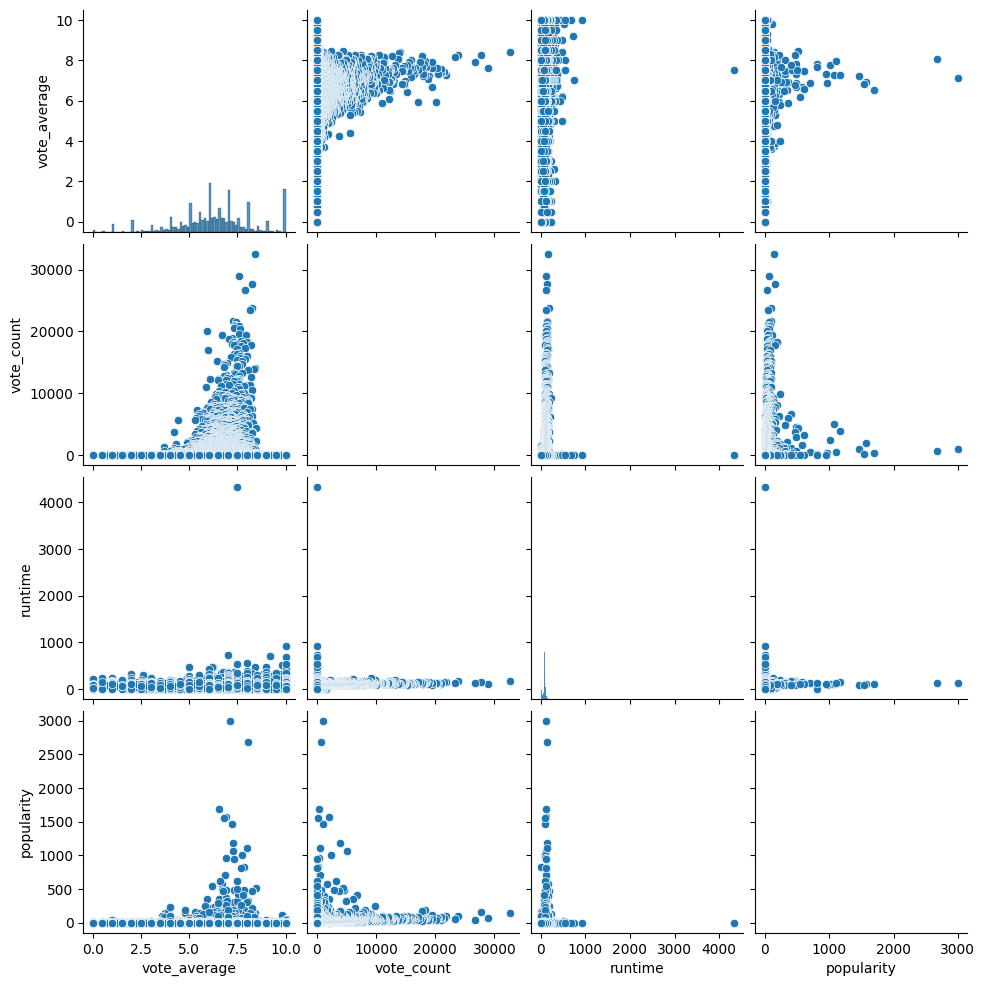

In [ ]:
# Plot a pairplot for numeric columns
sns.pairplot(df[['vote_average', 'vote_count', 'runtime', 'popularity']])

###7.Add 'Continent' Column###

To enrich our data set with geographic insights, we converted the "Country of Production" information into the more informative "Continent" field.

In [ ]:
# Define a function to map country to its continent
def get_continent(countries):
    continents = {
        'Asia': {'Afghanistan', 'Armenia', 'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', "Lao People's Democratic Republic", 'Lebanon', 'Macao', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'},
        'Africa': {'Algeria', 'Botswana', 'Cameroon', 'Chad', 'Congo', 'Egypt', 'Eritrea', 'Ethiopia', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Mali', 'Mauritius', 'Morocco', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
        'North America': {'Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Costa Rica', 'Dominican Republic', 'Guatemala', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Puerto Rico', 'St. Kitts and Nevis', 'United States of America'},
        'Oceania' : {'American Samoa', 'Cook Islands', 'French Polynesia', 'Northern Mariana Islands'},
        'South America': {'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica, Nicaragua', 'El Salvador', 'Cuba', 'Ecuador', 'Panama', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'},
        'Antarctica': {'South Georgia and the South Sandwich Islands'},
        'Europe': {'Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Netherlands', 'Northern Ireland', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'},
        'Australia': {'Australia', 'Christmas Island', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu'}
    }
    continent_set = set()
    # Use for loop to replace country with correct continent
    for country in countries:
        for continent, countries_set in continents.items():
            if country in countries_set:
                continent_set.add(continent)
    return ', '.join(continent_set)

# Create 'continent' column to replace 'production_countries', then drop the original 'production_countries' column
df['continent'] = df.loc[:,'production_countries'].apply(lambda x: get_continent(x.split(', ')))
df = df.drop('production_countries',axis=1)

###8.Get Dummy Variables###

In preparation for subsequent analyses, we transformed categorical variables such as 'genres' and 'continent' into dummy variables. This transformation resulted in 19 variables for genres and 7 variables for continents, providing granular insights into movie categorization and global distribution patterns.

In [ ]:
# Define a function to get dummy variables for categorical columns
def get_dummy(dataframe_name,column_name):
  # Split the column value into list and strip the blank spaces
  data_column = dataframe_name.loc[:,column_name]
  data = list(data_column.apply(lambda x: x.split(',')))
  data = [[item.strip() for item in sublist] for sublist in data]
  # Use TransactionEncoder to get dummy variables
  te = TransactionEncoder()
  te_data = te.fit(data).transform(data)
  df_encoded = pd.DataFrame(te_data, columns=te.columns_)
  return(df_encoded)

In [ ]:
# Get dummy variables for 'continent' column
df_continent = get_dummy(df,'continent')

In [ ]:
# Get dummy variables for 'genres' column
df_genres = get_dummy(df,'genres')

###9.Normalize Numeric Columns###

For the other continuous variables, we standardized them to ensure uniform scaling across the dataset.

In [ ]:
# Identify numeric columns, cast the 'year' column to string since we don't need it
df['year'] = df['year'].astype(str)
df_normalized = df.copy()
numeric_cols = df_normalized.select_dtypes(include=['number']).columns

# Create StandardScaler model and normalize the data
scaler = StandardScaler()
df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])

###10.Get Final Dataset###

As a culmination of these preprocessing steps, our final dataset included 33,688 rows for comprehensive analysis and insightful exploration.

In [ ]:
# Merge dummy genres and continents back to normalized df
df_normalized = df_normalized.merge(df_genres, how='outer',left_index=True,right_index=True)
df_normalized = df_normalized.merge(df_continent, how='outer',left_index=True,right_index=True)

In [ ]:
# Replace binary columns with True = 1 and False = 0
df_normalized = df_normalized.replace({True: 1, False: 0})
df_normalized.head()

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117684,29.447011,Released,1.983690,0,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",...,0,0,0,0,0,0,1,1,0,0
1,Deadpool,0.691243,26.103364,Released,0.714015,0,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,0,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",...,0,0,0,0,0,0,0,1,0,0
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,0,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",...,0,0,0,0,0,0,0,1,0,0
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,0,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",...,0,0,0,0,0,0,0,1,0,0
